In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import pickle

<h1> Data exploration

In [4]:
df = pd.read_csv("data/train.csv", index_col="Territory X Date")

In [5]:
df.head()

,target,cases,Territory,Date
Territory X Date,,,,
Afghanistan X 1/22/20,0,0,Afghanistan,1/22/20
Afghanistan X 1/23/20,0,0,Afghanistan,1/23/20
Afghanistan X 1/24/20,0,0,Afghanistan,1/24/20
Afghanistan X 1/25/20,0,0,Afghanistan,1/25/20
Afghanistan X 1/26/20,0,0,Afghanistan,1/26/20


- target variable is the cumulative number of deaths caused by COVID-19 in each country by each date.

In [6]:
df.shape

(11913, 4)

In [7]:
df.Date.unique()

array(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20',
       '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20',
       '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20',
       '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20',
       '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20',
       '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20',
       '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20',
       '3/16/20', '3/17/20', '3/18/20'], dtype=object)

In [8]:
df.Territory.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas (the)', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic (the)', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros (the)', 'Congo (the)', 'Costa Rica',
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', "Côte d'Ivoire",
       "Democratic People's Republic of Korea (the)",
       'Democratic Republic of the Congo (the)', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic (the)', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
 

In [10]:
df_france = df[df.Territory == "France"]
df_italy = df[df.Territory == "Italy"]
df_spain = df[df.Territory == "Spain"]
df_china = df[df.Territory == "China"]

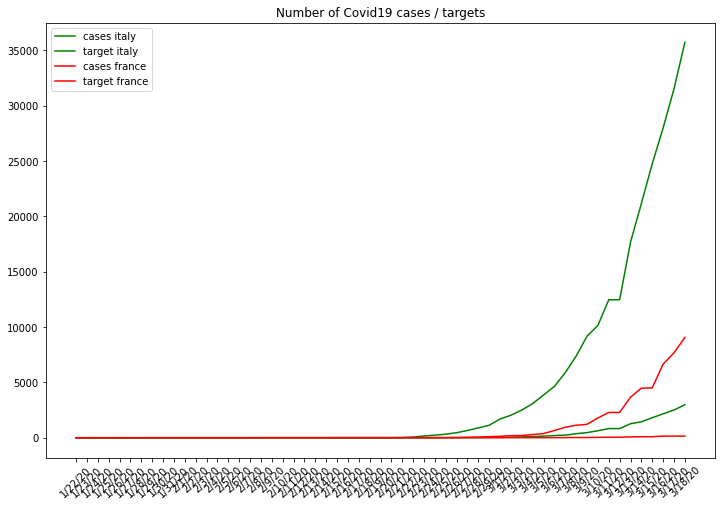

In [15]:
plt.figure(figsize=(12,8))
plt.plot(df_italy['Date'], df_italy['cases'], label="cases italy", c="g")
plt.plot(df_italy['Date'], df_italy['target'], label="target italy", c="g")
plt.plot(df_france['Date'], df_france['cases'], label="cases france", c="r")
plt.plot(df_france['Date'], df_france['target'], label="target france", c="r")
plt.title("Number of Covid19 cases / targets")
plt.xticks(rotation=45)
plt.legend()
plt.show()

<h1> restcountries.eu API

In [17]:
def get_name(countryCode):
    return requests.get("https://restcountries.eu/rest/v2/alpha/" + countryCode + "?fields=name").json()["name"]

In [18]:
def get_code(countryName):
    response = requests.get("https://restcountries.eu/rest/v2/name/" + countryName + '?fields=alpha3Code').json()
    print(response)
    return response[0]["alpha3Code"]

In [63]:
def get_popu(countryName):
    response = requests.get("https://restcountries.eu/rest/v2/name/" + countryName + '?fields=population').json()
    #print(countryName, response)
    return response[0]["population"]

In [64]:
get_popu("France")

66710000

In [21]:
get_code('United States of America')

[{'alpha3Code': 'USA'}]


'USA'

In [22]:
def get_neighbours(country):
    response = requests.get("https://restcountries.eu/rest/v2/name/" + country)
    neighbours = []
    for code in response.json()[0]['borders']:
        response = requests.get("https://restcountries.eu/rest/v2/alpha/" + code + "?fields=name")
        neighbours.append(response.json()["name"])
    return neighbours

In [23]:
get_neighbours("Morocco")

['Algeria', 'Western Sahara', 'Spain']

In [22]:
# interresting fields: population, area, borders, languages, 'regionalBlocs'
# get a uniform country name

<h1> Check Covid evolution for a country and its neighbours

In [24]:
ref_country = "France"

In [25]:
df.Date.min(), df.Date.max() #String need to change into Datetime

('1/22/20', '3/9/20')

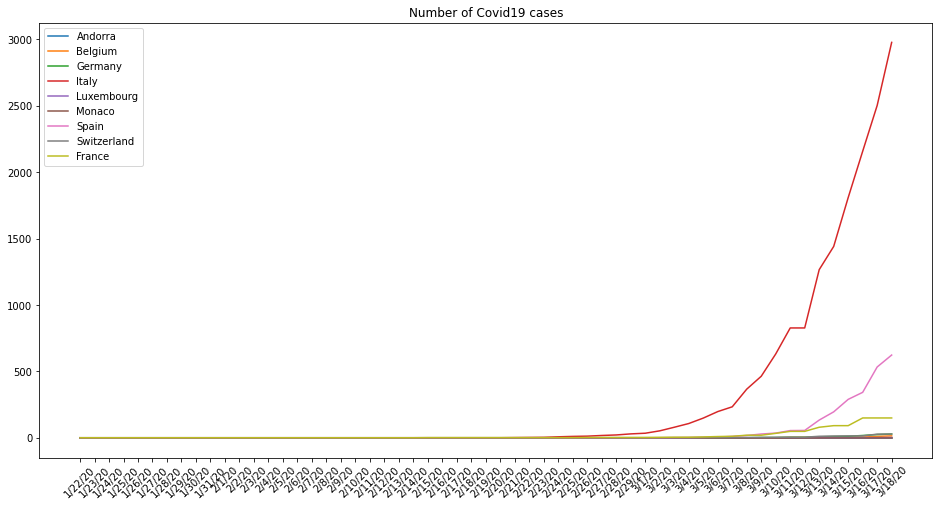

In [26]:
plt.figure(figsize=(16,8))
for country in get_neighbours(ref_country) + [ref_country]:
    df_country = df[df.Territory == country]
    plt.plot(df_country['Date'], df_country['target'], label=country)
    #plt.plot(df_country['Date'], df_country['cases'], label=country)
plt.xticks(rotation=45)
plt.title("Number of Covid19 cases")
plt.legend()
plt.show()

<h1> Get populations csv

In [ ]:
pkl_filepath = "population.pkl"

In [71]:
if os.path.isfile(pkl_filepath):

    exception_codes = {"Czechia": "CZE", "Democratic Republic of the Congo (the)": "COD", "North Macedonia": "MKD", "St Martin": "MAF"}
    population_dict = {}

    for country in df.Territory.unique():
        try:
            iso_country = country.replace(" (the)", "")
            population_dict[country] = get_popu(iso_country)
        except:
            print(country)
            code = exception_codes[country]
            iso_country = get_name(code)
            population_dict[country] = get_popu(iso_country)

    # dump to pickle file
    with open(pkl_filepath, 'wb') as f:
        pickle.dump(population_dict, f, pickle.HIGHEST_PROTOCOL)

Czechia
Democratic Republic of the Congo (the)
North Macedonia
St Martin


In [75]:
with open(pkl_filepath, 'rb') as f:
    population_dict = pickle.load(f)

<h1> Data selection function (design for Prophet)

In [241]:
def get_df_loc(y, country):
    df_loc = df[df.Territory == country].reset_index()[["Date", y]]
    df_loc = df_loc.rename(columns={'Date': 'ds', y: 'y'})
    df_loc.ds = pd.to_datetime(df_loc.ds)
    return df_loc

In [242]:
def get_ratio(df_cases, df_target, history_days=7):
    cases_rate = (df_cases.iloc[-1].y - df_cases.iloc[-history_days].y)
    target_rate = (df_target.iloc[-1].y - df_target.iloc[-history_days].y)
    return target_rate / (cases_rate + 1)   

<h1> Target ratio (= target / cases)

In [243]:
def get_ratio(df_cases, df_target, period=7):
    cases_rate = (df_cases.iloc[-1].y - df_cases.iloc[-period].y)
    target_rate = (df_target.iloc[-1].y - df_target.iloc[-period].y)
    return target_rate / (cases_rate + 1) 

In [244]:
get_df_loc("cases", "France").shape

(57, 2)

In [245]:
def get_period_ratio(country, period=7):
    ratio_lst = []
    df_cases = get_df_loc("cases", country)
    df_target = get_df_loc("target", country)
    #print(df_cases.shape[0]//period)
    for i in range(df_cases.shape[0]//period):
        init = i * period
        df_cases_week = df_cases.iloc[init:init+period]
        df_target_week = df_target.iloc[init:init+period]
        ratio_lst.append(get_ratio(df_cases_week, df_target_week, period))
    return ratio_lst

In [246]:
ratio_lst = get_period_ratio("France", 3)

In [247]:
ratio_lst

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.14285714285714285,
 0.0,
 0.02666666666666667,
 0.013550135501355014,
 0.03065134099616858,
 0.03006012024048096,
 0.014201183431952662,
 0.0]

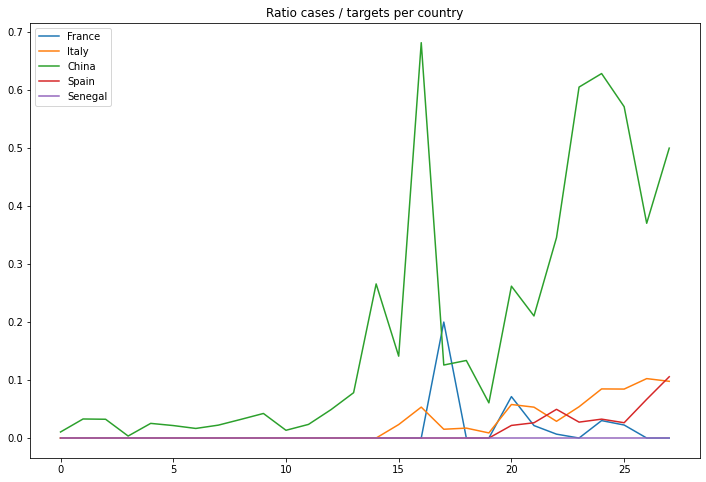

In [248]:
study_period = 2

plt.figure(figsize=(12,8))
plt.plot(get_period_ratio("France", study_period), label="France")
plt.plot(get_period_ratio("Italy", study_period), label="Italy")
plt.plot(get_period_ratio("China", study_period), label="China")
plt.plot(get_period_ratio("Spain", study_period), label="Spain")
plt.plot(get_period_ratio("Senegal", study_period), label="Senegal")
plt.title("Ratio cases / targets per country")
plt.legend()
plt.show()

<h1> PROPHET - Time series for a specific location

In [30]:
from fbprophet import Prophet

In [93]:
def make_forecast(df, growth, cap, floor, nb_days_forecast=45):
    if growth == "logistic":
        df['cap'] = cap
        df['floor'] = floor
    model = Prophet(growth=growth, changepoint_prior_scale=7, yearly_seasonality=False, daily_seasonality=False, )
    model.fit(df)
    future = model.make_future_dataframe(periods=nb_days_forecast, freq="D", include_history=True)
    if growth == "logistic":
        future['cap'] = cap
        future['floor'] = floor
    return model, future

<h2> Country selection

In [154]:
ref_country = "China"

In [155]:
df_cases = get_df_loc("cases", ref_country)
df_target = get_df_loc("target", ref_country)

In [156]:
get_ratio(df_cases, df_target)

0.40350877192982454

<h2> Cases forecast

In [157]:
population_at_risk_ratio = 0.1

In [158]:
def cases_prediction(df_cases, country):
    floor = df_cases.y.min()
    cap = population_dict[country] * population_at_risk_ratio
    print("floor: ", floor, "cap: ", cap)
    model_cases, future = make_forecast(df_cases, "logistic", cap, floor)
    forecast_cases = model_cases.predict(future)
    return model_cases, forecast_cases

In [159]:
model_cases, forecast_cases = cases_prediction(df_cases, ref_country)

floor:  548 cap:  137742216.6


<h2> Target forecast

In [160]:
def target_prediction(df_target, df_cases, forecast_cases):
    floor = df_target.y.min()
    cap = 1 + df_target.iloc[-1].y + get_ratio(df_cases, df_target) * max((forecast_cases.iloc[-1]['yhat'] - df_cases.iloc[-1]['y']), 0)
    print( "floor: ", floor, "cap: ", cap)
    model_target, future = make_forecast(df_target, "logistic", cap, floor)
    forecast_target = model_target.predict(future)
    return model_target, forecast_target

In [161]:
model_target, forecast_target = target_prediction(df_target, df_cases, forecast_cases)

floor:  17 cap:  3738.8502777498693


<h2> Plot prophet forecast

- Update the ratio (get_ratio) each week
- Get demographic info to assess the population_at_risk and properly define the cases_prediction cap
    -> https://registry.opendata.aws/dataforgood-fb-hrsl/
- Properly study the 3 cases: 
    - China (virus already gone) 
    - France (virus in action) 
    - Senegal (virus not yet arrived)
- Add a timer to the main script

<Figure size 1296x576 with 0 Axes>

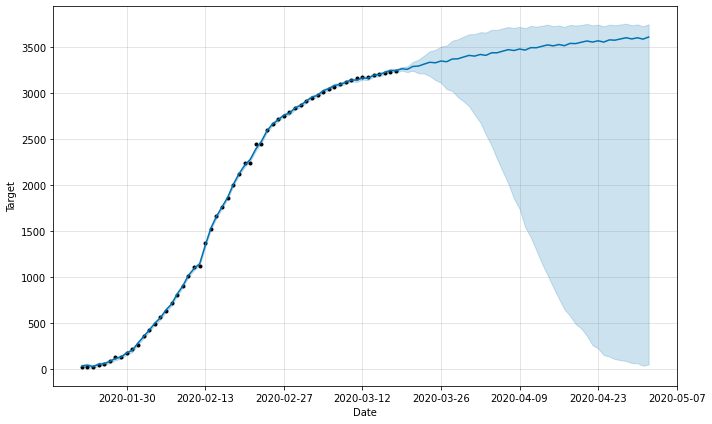

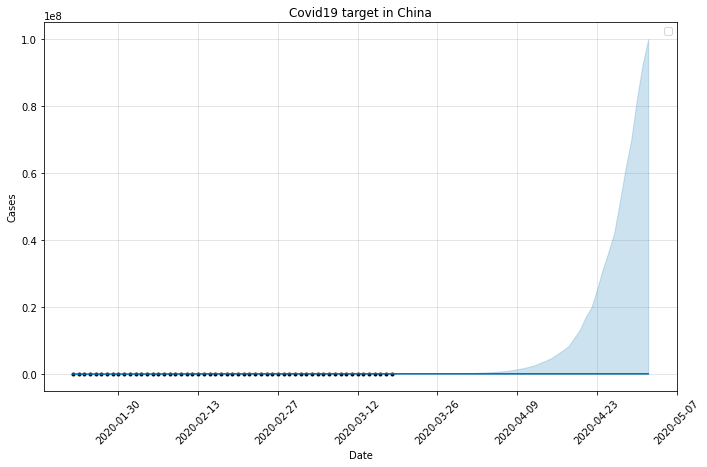

In [162]:
plt.figure(figsize=(18, 8))
model_target.plot(forecast_target, xlabel = 'Date', ylabel = "Target", plot_cap=False)
model_cases.plot(forecast_cases, xlabel = 'Date', ylabel = "Cases", plot_cap=False)
plt.title('Covid19 target in ' + ref_country)
plt.xticks(rotation=45)
plt.legend()
plt.show()

<h1> Get prediction per country

In [36]:
df_default = pd.DataFrame(data=["2020-03-19", "2020-03-20", "2020-03-21", "2020-03-22", "2020-03-23", "2020-03-24", "2020-03-25"], columns=["ds"])
df_default.ds = pd.to_datetime(df_default.ds)
df_default["yhat"] = np.zeros(7, int)

In [37]:
# Store into a pickle model and forecast
def get_prediction(country):
    df_cases = get_df_loc("cases", country)
    df_target = get_df_loc("target", country)
    
    if (df_cases.y.max() > 0) & (df_target.y.max() > 0) :
        model_cases, forecast_cases = cases_prediction(df_cases)
        model_target, forecast_target = target_prediction(df_target, df_cases, forecast_cases)
        return forecast_target.iloc[-7:][['ds', 'yhat']]
    else:
        return df_default

In [38]:
y_pred = get_prediction("Argentina")

Argentina
floor:  0 cap:  100000000
floor:  0 cap:  7.608335232024318


In [39]:
y_pred

,ds,yhat
57,2020-03-19,2.716696
58,2020-03-20,3.094801
59,2020-03-21,3.360366
60,2020-03-22,3.751706
61,2020-03-23,4.014284
62,2020-03-24,4.268404
63,2020-03-25,4.518269


- Put a timer

In [41]:
selection = ["Andorra", "Angola", "Antigua and Barbuda"]
country_selection = df.Territory.unique()

def generate_subfile():
    df_sub = pd.DataFrame()
    for i, country in enumerate(country_selection):
        print(i, "out of", len(country_selection), country)
        try:
            y_pred = get_prediction(country)
            df_res = y_pred.iloc[-7:][['ds', 'yhat']]
            df_res["Territory X Date"] = df_res.ds.apply(lambda x: country + " X " + x.strftime('%-m/%d/%y'))
            df_res["target"] = df_res["yhat"]
            df_sub = pd.concat([df_sub, df_res[["Territory X Date", "target"]]])
        except:
            print("ISSUE: ", country)
    return df_sub

In [42]:
df_sub = generate_subfile()

Afghanistan
Albania
floor:  0 cap:  100000000


/usr/local/lib/python3.7/site-packages/fbprophet/forecaster.py:1256: RuntimeWarning:

overflow encountered in exp



floor:  0 cap:  54.25111954579301
Algeria
floor:  0 cap:  100000000
floor:  0 cap:  24.237350610989115
Andorra
Angola
Antigua and Barbuda
Argentina
floor:  0 cap:  100000000
floor:  0 cap:  7.608335232024318
Armenia
Aruba
Australia
floor:  0 cap:  100000000
floor:  0 cap:  681823.3436292337
Austria
floor:  0 cap:  100000000
floor:  0 cap:  24.49547086307308
Azerbaijan
floor:  0 cap:  100000000
floor:  0 cap:  11.046894488316081
Bahamas (the)
Bahrain
floor:  0 cap:  100000000
floor:  0 cap:  6.610059948394589
Bangladesh
floor:  0 cap:  100000000
floor:  0 cap:  8.026580322730656
Barbados
Belarus
Belgium
floor:  0 cap:  100000000
floor:  0 cap:  64.926431613652
Belize
Benin
Bermuda
Bhutan
Bolivia (Plurinational State of)
Bosnia and Herzegovina
Botswana
Brazil
floor:  0 cap:  100000000
floor:  0 cap:  25.20002396699314
Brunei Darussalam
Bulgaria
floor:  0 cap:  100000000
floor:  0 cap:  10.459340816139663
Burkina Faso
floor:  0 cap:  100000000
floor:  0 cap:  15.817373786514278
Burundi
Ca

In [62]:
df_sub = df_sub.reset_index()
print(df_sub.shape)
df_sub.tail()

(1463, 2)


,Territory X Date,target
2,Zimbabwe X 03/21/20,0.0
3,Zimbabwe X 03/22/20,0.0
4,Zimbabwe X 03/23/20,0.0
5,Zimbabwe X 03/24/20,0.0
6,Zimbabwe X 03/25/20,0.0


<h1> Fill submission file

In [45]:
submit_file = "SampleSubLocal.csv"
df_submit = pd.read_csv(submit_file)
df_submit.shape

(1463, 2)

In [68]:
#df_submit["target"] =  df_sub["target"]

In [69]:
df_sub.to_csv("mySubmission_new.csv", index=False)

<h1> TODO

- Update the ratio (get_ratio) each week
- Get demographic info to assess the population_at_risk and properly define the cases_prediction cap
    -> https://registry.opendata.aws/dataforgood-fb-hrsl/
- Properly study the 3 cases: 
    - China (virus already gone) 
    - France (virus in action) 
    - Senegal (virus not yet arrived)
- Add a timer to the main script

- Produce data_sub with forcast and history for each country
- Web app to display those forecast
- Preprocessing: apply a log on the history
- Properly display the 3 cases on the jupyter
- build up a test_train_split to train the model